In [18]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD, RMSprop
from keras.metrics import Precision, Recall
import matplotlib.pyplot as plt

In [19]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [20]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [22]:
model = Sequential()

In [23]:
for layer in model.layers[:6]:
    layer.set_weights(base_model.get_layer(layer.name).get_weights())

In [24]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [25]:
for layer in model.layers[:6]:
    layer.trainable = False

In [26]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 149s 79ms/step - loss: 0.5316 - accuracy: 0.8111 - precision_2: 0.8785 - recall_2: 0.7363 - val_loss: 0.4517 - val_accuracy: 0.8307 - val_precision_2: 0.8634 - val_recall_2: 0.8007
Epoch 2/10
1875/1875 [==============================] - 149s 79ms/step - loss: 0.3769 - accuracy: 0.8650 - precision_2: 0.8954 - recall_2: 0.8353 - val_loss: 0.4464 - val_accuracy: 0.8223 - val_precision_2: 0.8432 - val_recall_2: 0.8008
Epoch 3/10
1875/1875 [==============================] - 149s 79ms/step - loss: 0.3357 - accuracy: 0.8802 - precision_2: 0.9040 - recall_2: 0.8576 - val_loss: 0.3578 - val_accuracy: 0.8744 - val_precision_2: 0.8982 - val_recall_2: 0.8511
Epoch 4/10
1875/1875 [==============================] - 150s 80ms/step - loss: 0.3129 - accuracy: 0.8881 - precision_2: 0.9087 - recall_2: 0.8687 - val_loss: 0.3876 - val_accuracy: 0.8564 - val_precision_2: 0.8784 - val_recall_2: 0.8357
Epoch 5/10
1875/1875 [==============================

In [ ]:
model.evaluate(test_images, test_labels)

242/313 [======================>.......] - ETA: 4s - loss: 0.3051 - accuracy: 0.8900 - precision_2: 0.9055 - recall_2: 0.8790

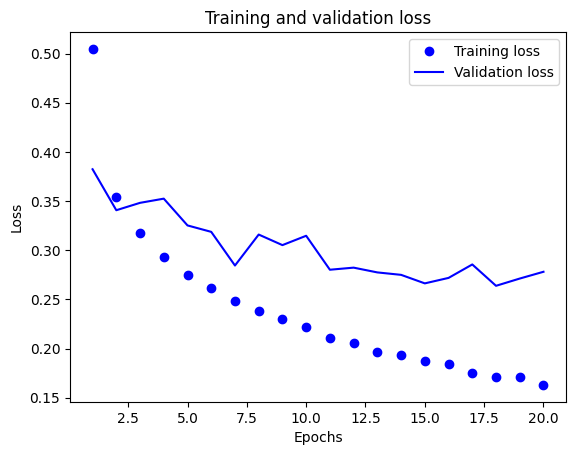

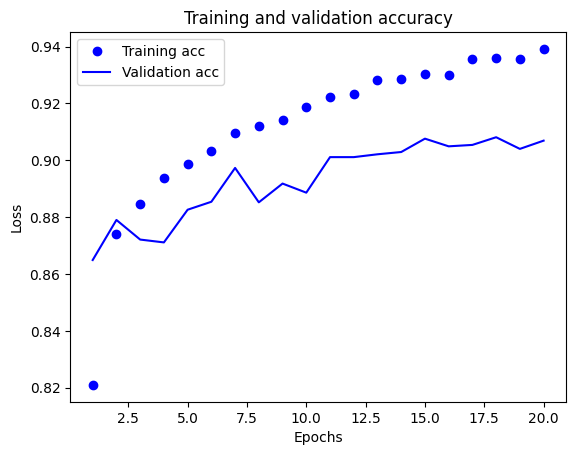

In [17]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()